<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/01_Neural_Network_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction Regression with Neural Network in TensorFlow**

There are many definitions for the regression problem but in our case, we're going to simplify it. Predicting a number based few inputs called features and label called output

More simple : Predicting a number

In [35]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-11-25 19:37:51.253655


**Creating data to view and fit**

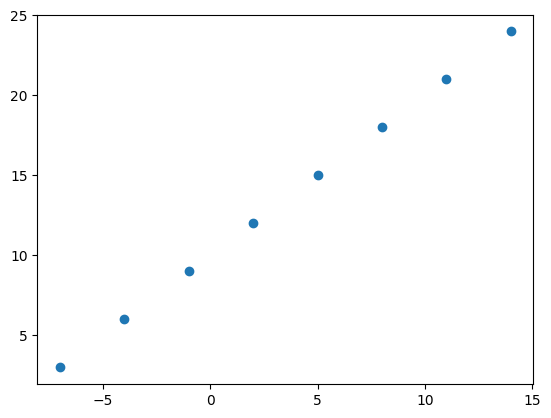

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Create features

X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)



In [16]:
y == X + 10 #if we closely observe the relation between above graph then we can realize as it is as true y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Input and Output Shapes**

In [17]:
#Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom", "bathroom", "garage"]) # Shape would be 3
house_price = tf.constant([939700])   # Shape would be 1
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [37]:
house_info.shape

TensorShape([3])

In [18]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [19]:
X[0], y[0]

(-7.0, 3.0)

In [20]:
X[1], y[1]

(-4.0, 6.0)

In [29]:
# turn our numpy arrays as tensors with dtype float32

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
input_shape = X[0].shape    # as scalar has shape 0 it will not give us the shape
output_shape = y[0].shape   # as scalar has shape 0 it will not give us the shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

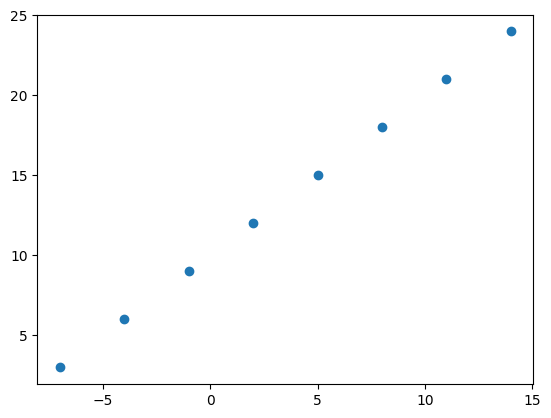

In [23]:
plt.scatter(X,y)

**Steps in modeling with TensorFlow**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2.Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 872ms/step - loss: 11.8223 - mae: 11.8223
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 11.6898 - mae: 11.6898
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.5573 - mae: 11.5573
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 11.4248 - mae: 11.4248
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2923 - mae: 11.2923


In [39]:
# Chench the X and y

X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [42]:
#Try and make a prediction using a model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 35ms/step


array([[11.174046]], dtype=float32)

In [43]:
y_pred + 11

array([[22.174046]], dtype=float32)

**Improving the model**

We can improve our model by altering the steps we taken to create our model

1. **Creating model** : here We might add more layers, increase the number of hidden layers, chnage the activation function of each layer.

2. **Compiling a model** : Here we might change the optimization function or perhaps the **Learning rate** of the optimization function.

3. **Fitting a model** : Here we might fit a model for more **Epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [51]:

# Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# in the output it would be improved for better than before by just increasing the epochs to 100 training examples

Epoch 1/100
1/1 [==============================] - 1s 555ms/step - loss: 10.4640 - mae: 10.4640
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3315 - mae: 10.3315
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1990 - mae: 10.1990
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0665 - mae: 10.0665
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 9.9340 - mae: 9.9340
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8015 - mae: 9.8015
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 9.6690 - mae: 9.6690
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 9.5365 - mae: 9.5365
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4040 - mae: 9.4040
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2715 - mae: 9.2715
Epoch 11/100
1/1 [==============================] - 0s 11ms/

In [52]:
# Reming ourselves of the data

model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.836191]], dtype=float32)

In [59]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 778ms/step - loss: 10.2309 - mae: 10.2309
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7809 - mae: 9.7809
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3309 - mae: 9.3309
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8809 - mae: 8.8809
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4310 - mae: 8.4310
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9810 - mae: 7.9810
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5310 - mae: 7.5310
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0810 - mae: 7.0810
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9000 - mae: 6.9000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8262 - mae: 6.8262
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [60]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[27.255775]], dtype=float32)

In [62]:
# Create the model with the extra layers which are hidden

#Creare a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics =["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100) # it would get more optimized after this modiciation by adding 1 more hidden layer with 100 neurons


Epoch 1/100
1/1 [==============================] - 1s 667ms/step - loss: 12.5131 - mae: 12.5131
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9023 - mae: 11.9023
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2876 - mae: 11.2876
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6727 - mae: 10.6727
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0424 - mae: 10.0424
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3885 - mae: 9.3885
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7032 - mae: 8.7032
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9782 - mae: 7.9782
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2078 - mae: 7.2078
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.3812 - mae: 6.3812
Epoch 11/100
1/1 [==============================] - 0s 11ms/

In [65]:
#Let's remind ourselves of the data

X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [67]:
model.predict([17])

#1/1 [==============================] - 0s 37ms/step
#array([[32.63552]], dtype=float32). before this model was better than this but this is better than the initial one


1/1 [==============================] - 0s 64ms/step


array([[32.63552]], dtype=float32)